# Top 1000 YouTube Content Creators Analysis

## Overview
This analysis delves into the dataset of the top 1000 YouTube content creators, encompassing critical statistics such as rankings, categories, subscriber counts, country demographics, visit metrics, likes, comments, and more. The objective is to extract insights and trends from this rich dataset to better understand the landscape of influential YouTube personalities.

## Dataset Description
The dataset includes the following columns:
- **Ranking**: Position of the content creator in the top 1000.
- **Categories**: Genres or niches of content.
- **Subscribers**: Number of subscribers to the channel.
- **Country**: Origin country of the content creator.
- **Visits**: Visit metrics for the channel.
- **Likes**: Count of likes received.
- **Comments**: Number of comments on videos.


## Goals
- Analyze trends among top YouTube content creators.
- Identify popular categories or genres.
- Explore relationships between subscribers, likes, comments, and other metrics.
- Uncover insights into the geographical distribution of top creators.

## Analysis Steps
1. **Data Cleaning and Preparation**
   - Handling missing values, duplicates, and inconsistencies.
2. **Exploratory Data Analysis (EDA)**
   - Summary statistics, distributions, and visualizations.
3. **Feature Engineering**
   - Deriving new features for deeper insights.
4. **In-depth Analysis**
   - Exploring correlations, trends, and patterns.
5. **Conclusion and Insights**

## Tools and Libraries
- Python (Pandas, NumPy, Matplotlib, Seaborn)
- Jupyter Notebooks for analysis and visualization.

## Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
youtube = pd.read_csv("youtubers_df.csv")
youtube.head()


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


# Feature Engineering 

In [3]:
# Knowing more about the data set 
youtube.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [4]:
youtube.rename(columns={'Suscribers': 'Subscribers'}, inplace=True)

 ### Checking for missing data

In [5]:
youtube.isnull().sum()

Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

### Handling missing values 

In [6]:
youtube['Categories'].fillna(method='ffill', inplace=True)
youtube.isnull().sum()

Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

In [7]:
youtube.sample(5)

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
128,129,SMTOWN,Música y baile,32200000.0,Estados Unidos,132300.0,12700.0,505.0,http://youtube.com/channel/UCEf_Bc-KVd7onSeifS...
534,535,DylandPROS,"Películas, Animación",16200000.0,Indonesia,21500.0,996.0,28.0,http://youtube.com/channel/UCXdmo_q4SawYMz-dme...
259,260,WaveMusicBhojpuri,Música y baile,23400000.0,India,8400.0,154.0,7.0,http://youtube.com/channel/UCYLlkv4hivYJlOk6Lo...
411,412,DanielSaboya,Música y baile,18600000.0,Brasil,12600.0,544.0,6.0,http://youtube.com/channel/UCEUf_uUDUfJJ3XfgwO...
683,684,dangmattsmith,"Animación, Humor",14400000.0,Unknown,58000.0,3000.0,274.0,http://youtube.com/channel/UCe56RtxwepRSyZ-b--...


## 1. Trend Analysis

### Identify trends among the top YouTube streamers:
- Explore subscriber counts, engagement metrics, and geographical distribution.
  
### Most Popular Categories:
- Analyze the prevalence of categories among top streamers.
  
### Correlation between Subscribers and Engagement:
- Investigate the relationship between subscribers, likes, and comments.



In [8]:
## Exploring subscriber count

subscriber_stats = youtube['Subscribers'].describe()
subscriber_stats

count    1.000000e+03
mean     2.189440e+07
std      1.682775e+07
min      1.170000e+07
25%      1.380000e+07
50%      1.675000e+07
75%      2.370000e+07
max      2.495000e+08
Name: Subscribers, dtype: float64

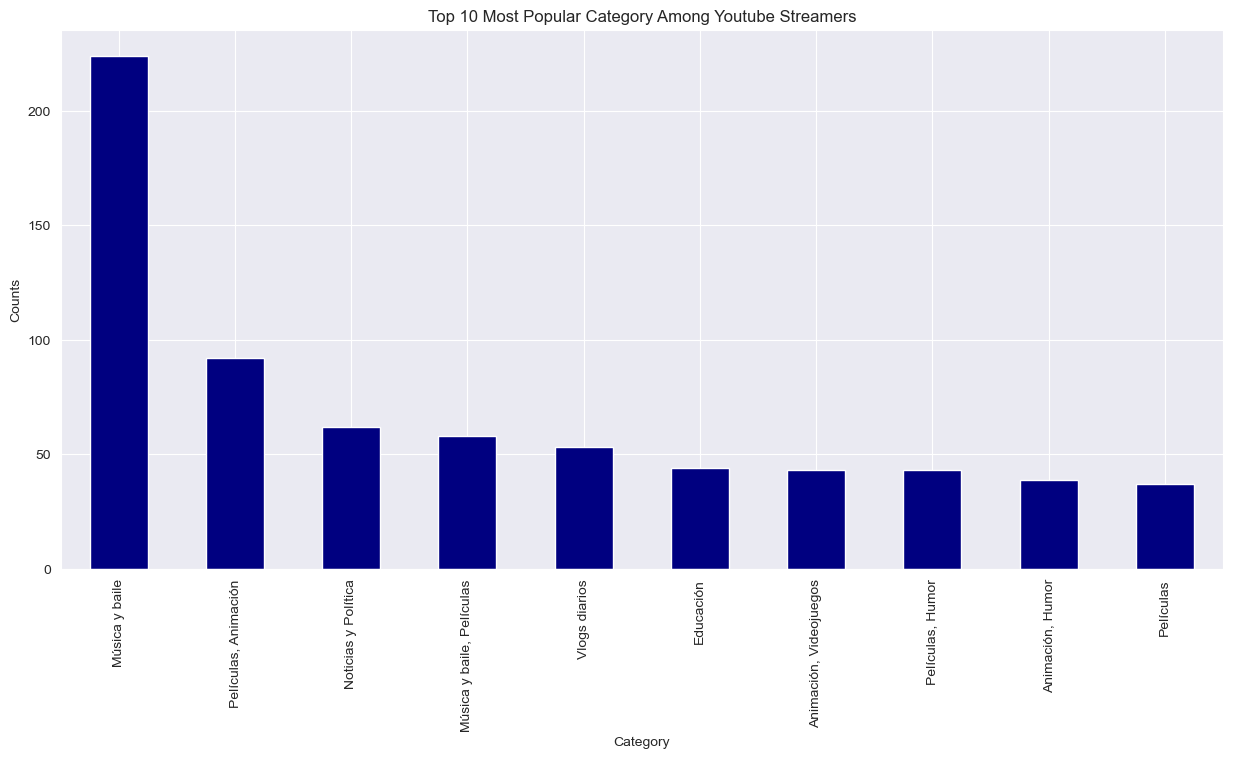

In [9]:
# Analyze Category Distribution
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
category_counts = youtube['Categories'].value_counts()
top_categories = category_counts.head(10)  # Consider top 10 categories
category_chart = top_categories.plot(kind='bar', color='navy')

plt.xlabel("Category")
plt.ylabel("Counts")
plt.title('Top 10 Most Popular Category Among Youtube Streamers')
plt.savefig('Top10Categories')
plt.show()

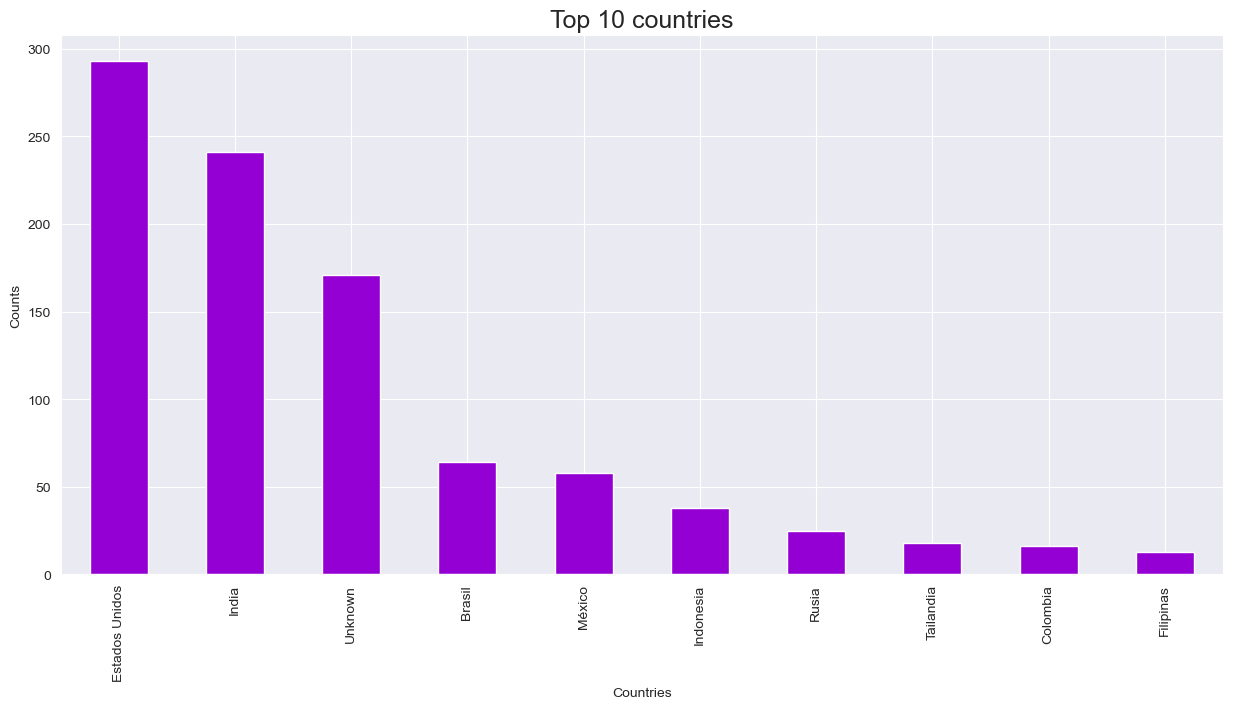

In [10]:
# Geographic Analysis
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
topCountries = youtube['Country'].value_counts().head(10) # Top 10
topCountries.plot(kind='bar', color='darkviolet', width=0.5)
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.title("Top 10 countries", fontsize=18)
plt.savefig('TopCountries')
plt.show()

In [11]:
## Engagement metrics (Correlation)

correlation = youtube[['Subscribers', 'Likes', 'Comments' ]].corr()
correlation

,Subscribers,Likes,Comments
Subscribers,1.000000,0.211639,0.036350
Likes,0.211639,1.000000,0.325911
Comments,0.036350,0.325911,1.000000


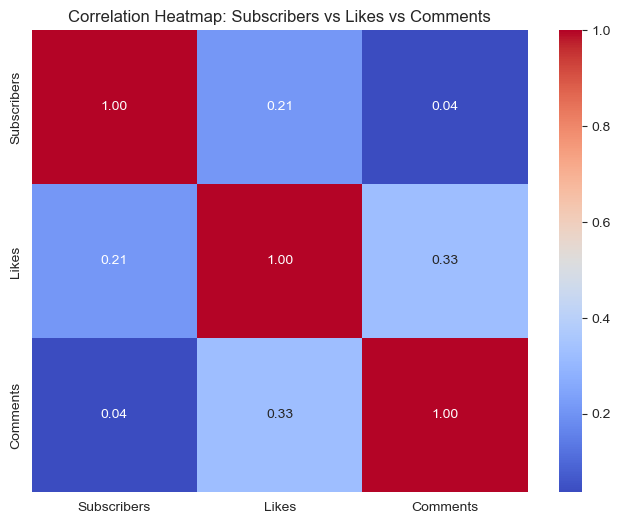

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation , annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Subscribers vs Likes vs Comments')
plt.savefig("Heatmap")
plt.show()

## 3.  Audience Study: Analyzing Streamers' Audiences

### Objective:
Investigate audience distribution among YouTube streamers by country and explore potential regional preferences for content categories.

### Methodology:
- **Country Distribution Analysis:** Explore audience distribution across countries.
- **Content Category Preferences:** Investigate correlations between content categories and geographic locations.

### Findings:
- **Country Distribution:** Identify top countries with high audience concentration.
- **Regional Content Preferences:** Discover if certain categories are more popular in specific regions.

### Implications:
Understanding regional content preferences aids in:
- Tailoring content strategies based on regional audience interests.
- Targeted marketing strategies for specific regions.
- Optimizing engagement based on geographic audience variations.

### Conclusion:
This study uncovers audience distribution and potential regional content preferences among YouTube streamers, offering insights for tailored content and marketing strategies.


In [13]:
# Calculating audience distribution by country
audience_by_country = youtube.groupby("Country").size().sort_values(ascending=False)
audience_df = pd.DataFrame({'Audience_Count': audience_by_country})
audience_df.reset_index(inplace=True)
audience_df.head()

,Country,Audience_Count
0,Estados Unidos,293
1,India,241
2,Unknown,171
3,Brasil,64
4,México,58


## Visualize top country by audience count

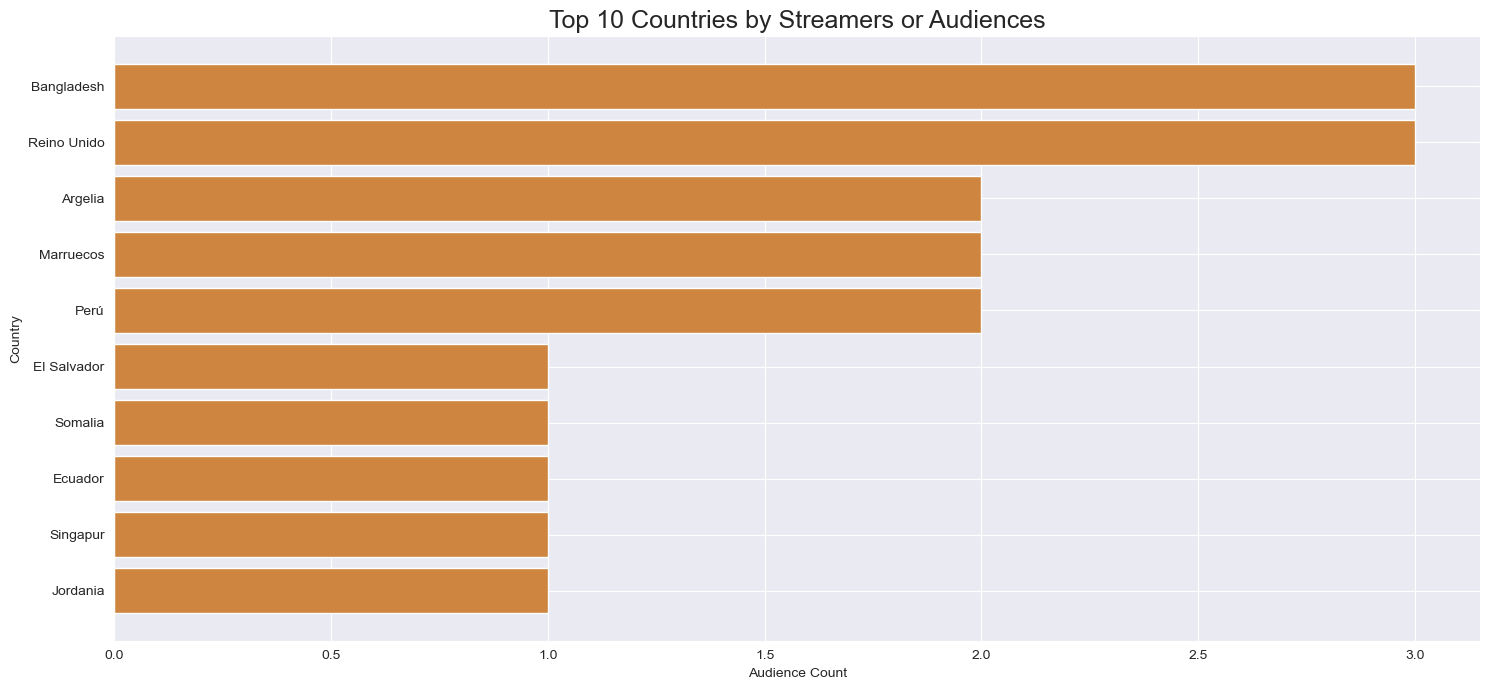

<Figure size 640x480 with 0 Axes>

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sorted_df = audience_df.sort_values(by='Audience_Count', ascending=True).head(10)
plt.barh(sorted_df['Country'], sorted_df['Audience_Count'], color='peru')
plt.title('Top 10 Countries by Streamers or Audiences', fontsize=18)
plt.xlabel('Audience Count')
plt.ylabel('Country')

plt.tight_layout()
plt.show()
plt.savefig('Audiencestream')

## Content Category preferences 

### Conclusion
 * Based on the visuals below, we can conclude that Música y baile is the most preferred content based in Brazil

In [15]:
content_category = youtube.groupby('Country')['Categories'].value_counts().reset_index(name='Category_Count')


# Identify the top content category by country
top_category_by_country = content_category.groupby('Country').first()
top_category_by_country.reset_index(inplace=True)
top_category_by_country

,Country,Categories,Category_Count
0,Arabia Saudita,Música y baile,2
1,Argelia,Educación,1
2,Argentina,"Películas, Animación",2
3,Bangladesh,Noticias y Política,1
4,Brasil,Música y baile,17
5,Colombia,Música y baile,6
6,Ecuador,Noticias y Política,1
7,Egipto,Música y baile,2
8,El Salvador,"Películas, Humor",1
9,España,"Música y baile, Películas",1


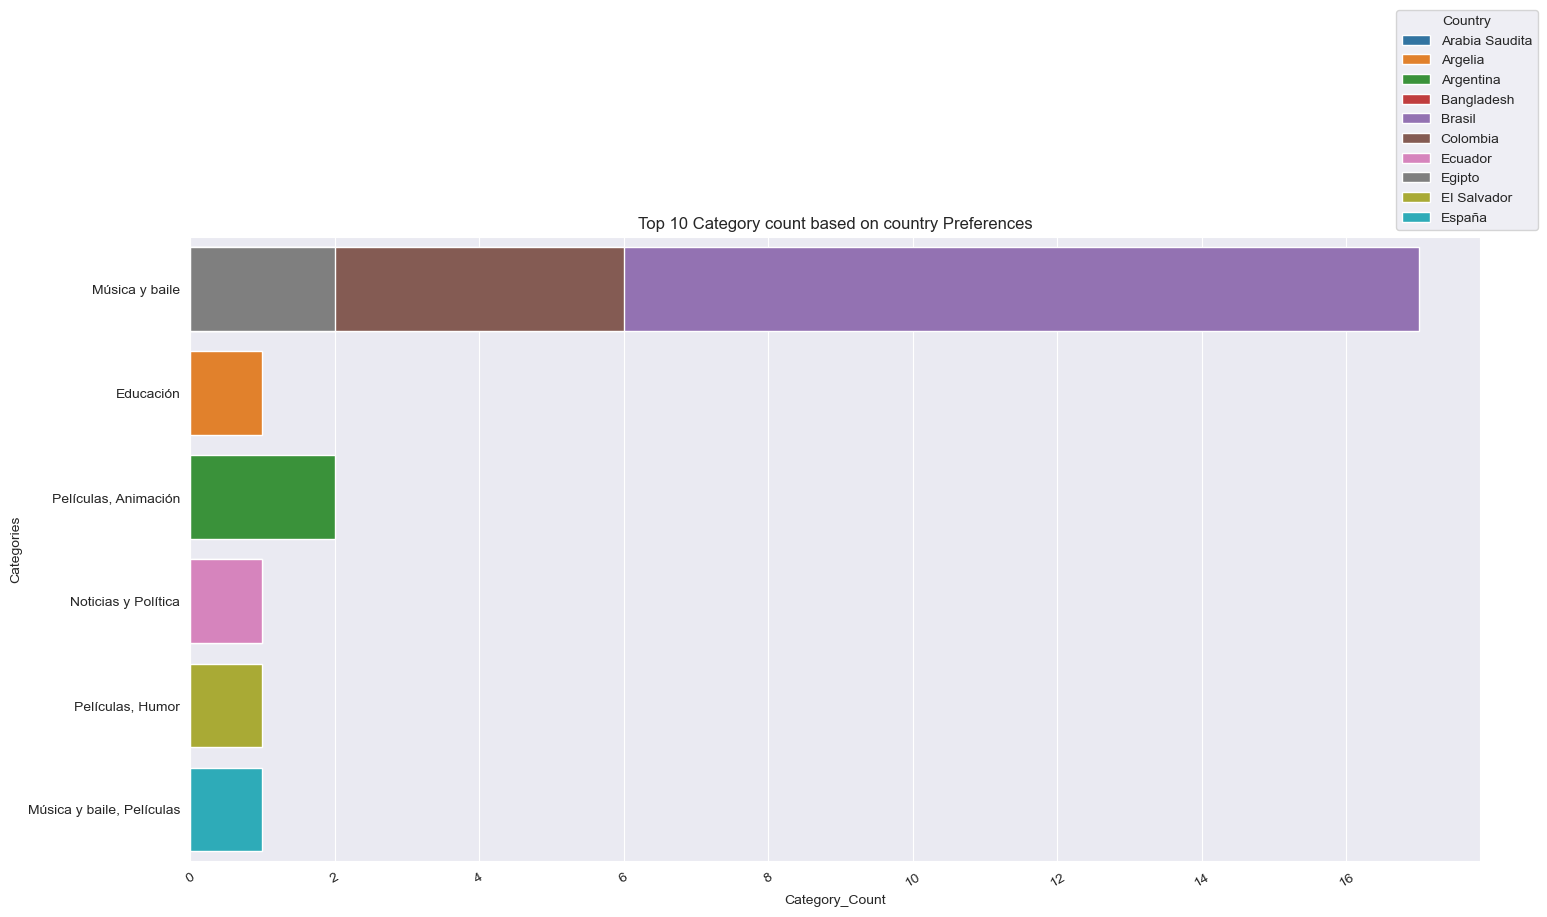

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(15,7))
sns.barplot(data=top_category_by_country.head(10), x='Category_Count', y='Categories', dodge=False, errorbar=None, hue='Country')
plt.xticks(rotation=30)
plt.tight_layout()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='lower right')
plt.title("Top 10 Category count based on country Preferences")
plt.show()

plt.savefig("CategoryBasedPreferences")

# 4. Performance Metrics

### Analysis of Average Metrics

#### Observations:
- **Visits:** The platform records a notably high average count of approximately 1.21 million visits, indicating substantial traffic.
- **Likes:** User engagement, reflected in likes, is significant, averaging around 53,600 likes per content piece.
- **Comments:** However, the average count of comments is relatively lower at approximately 1,288, indicating comparatively lower user engagement in commenting.

#### Patterns:
- A clear pattern emerges with significantly higher visit counts compared to both likes and comments.
- Likes notably surpass comments, indicating a trend of higher engagement in liking content over commenting.

#### Anomalies:
- Further investigation is recommended to identify outliers or unusual values that could skew these averages or suggest atypical user behavior.

This brief analysis outlines the platform's engagement levels based on average metrics, highlighting patterns and differences in user interaction with the content.

In [17]:
average_metrics = youtube[['Comments', 'Likes', 'Visits' ]].mean()
average_metrics = pd.DataFrame(average_metrics)
average_metrics.reset_index(inplace=True)
average_metrics.rename(columns={'index': 'Metrics', 0:'Mean_Value'}, inplace=True )
average_metrics

,Metrics,Mean_Value
0,Comments,1.288768e+03
1,Likes,5.363259e+04
2,Visits,1.209446e+06


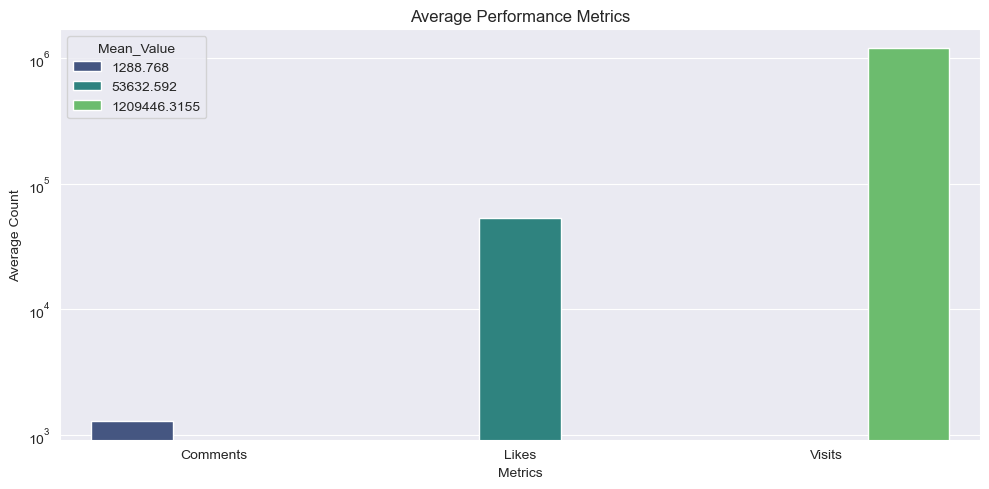

In [18]:
# Plotting using seaborn barplot
plt.figure(figsize=(10, 5))
sns.barplot(data=average_metrics, x='Metrics', y='Mean_Value', hue='Mean_Value', palette='viridis')
plt.title('Average Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Count')
plt.yscale('log')

plt.tight_layout()
plt.show()

# 5 Content categories 
### Content Category Analysis:

#### Distribution of Streamers:
- **Top Streamed Category:** The category 'Videojuegos, Humor' stands out as the most streamed content category, accumulating a substantial visit count of 184,009,700.

This brief analysis highlights the category that garners the highest visit count, indicating its popularity among streamers on the platform.

In [19]:
# Group by 'Categories' and sum 'Visits' within each category
category_visits = youtube.groupby('Categories')['Visits'].sum().sort_values(ascending=False)
category_visits = pd.DataFrame(category_visits)
category_visits.reset_index(inplace=True)
plot = category_visits.head(10)
plot

,Categories,Visits
0,"Videojuegos, Humor",184009700.0
1,Vlogs diarios,138678400.0
2,"Animación, Humor",117612800.0
3,Música y baile,112377660.0
4,"Películas, Humor",55027400.0
5,"Animación, Videojuegos",53697600.0
6,"Películas, Animación",51940100.0
7,Videojuegos,49690600.0
8,Noticias y Política,46316800.0
9,Educación,42074855.5


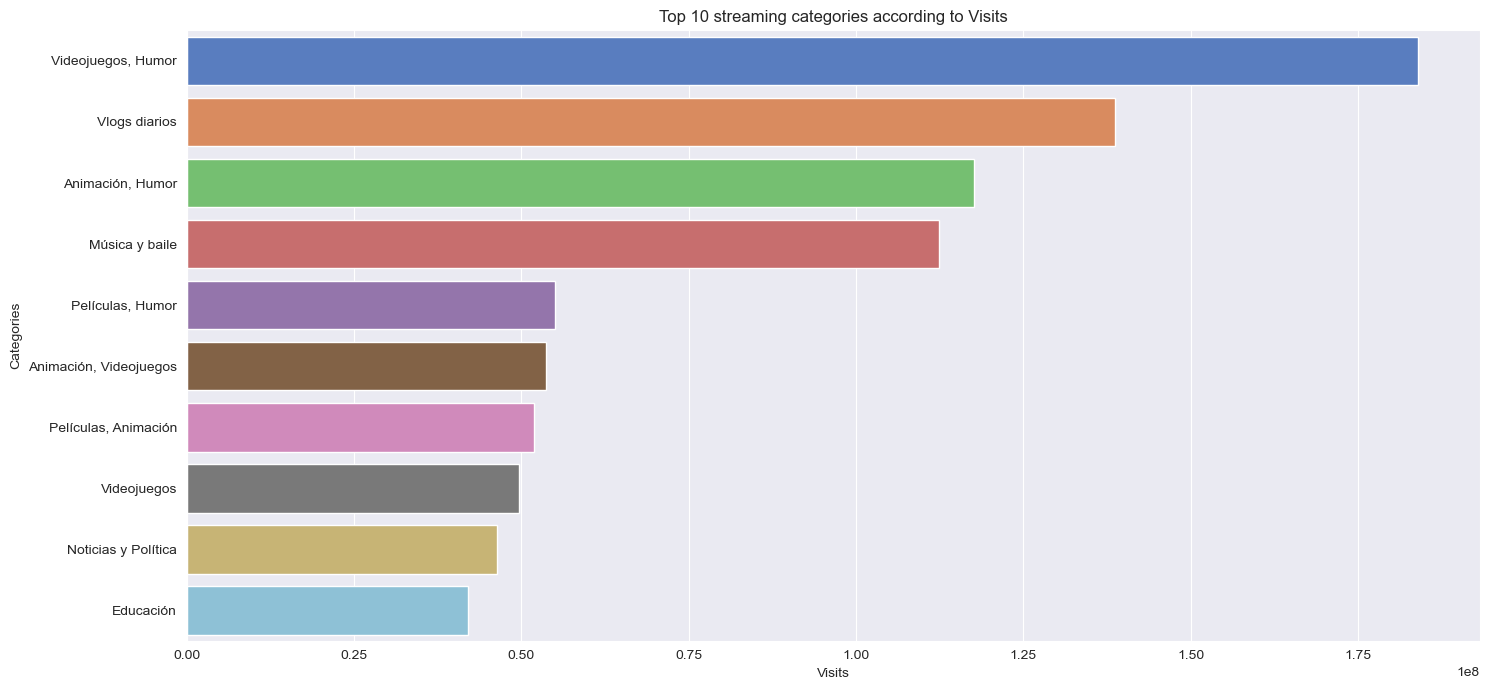

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(15,7))
sns.barplot(data=plot, x='Visits', y='Categories', palette='muted')
plt.title("Top 10 streaming categories according to Visits")
plt.tight_layout()
plt.show()
plt.savefig('HighestStreamingContent')

# Specific categories with exceptional performance metrics

### Category Performance Analysis based on Likes:

#### Exceptional Performance:
- **'Vlogs Diarios':** This category displays exceptional performance metrics in terms of likes, amassing a noteworthy count of likes amounting to 7,384,913.

This analysis spotlights the 'Vlogs Diarios' category for its remarkable performance based on the high number of likes, indicating significant engagement within this specific content category.

In [21]:
exceptionalCat = youtube.groupby('Categories')['Likes'].sum().sort_values(ascending=False)
exceptionalCat = pd.DataFrame(category_visits)
exceptionalCat.reset_index(inplace=True)
exception = exceptionalCat.head(10)
exception

,index,Categories,Visits
0,0,"Videojuegos, Humor",184009700.0
1,1,Vlogs diarios,138678400.0
2,2,"Animación, Humor",117612800.0
3,3,Música y baile,112377660.0
4,4,"Películas, Humor",55027400.0
5,5,"Animación, Videojuegos",53697600.0
6,6,"Películas, Animación",51940100.0
7,7,Videojuegos,49690600.0
8,8,Noticias y Política,46316800.0
9,9,Educación,42074855.5


# 6. Brands and Collaborations Analysis:

This study focused on examining the relationship between high-performance metrics—specifically, likes, comments, and subscribers—among top YouTube streamers. The analysis aimed to discern potential correlations between these metrics and external engagements, such as brand collaborations, primarily using the highest likes per user as a key reference point.

In [100]:
brands = youtube[['Categories','Comments', 'Likes', 'Visits']].sort_values(by = 'Likes' ,ascending=False)

top_brands = brands.head(10)
top_brands

,Categories,Comments,Likes,Visits
1,"Videojuegos, Humor",18500.0,5300000.0,117400000.0
136,Vlogs diarios,11600.0,5000000.0,83100000.0
153,"Animación, Humor",82800.0,1700000.0,52700000.0
341,Humor,38000.0,1400000.0,11100000.0
734,Animación,15800.0,1200000.0,11700000.0
488,Comida y bebida,24000.0,952100.0,21500000.0
586,Noticias y Política,1200.0,712400.0,15400000.0
300,"Películas, Humor",2100.0,707600.0,12900000.0
123,"Animación, Videojuegos",26000.0,617400.0,6500000.0
238,"Animación, Videojuegos",5900.0,582600.0,7600000.0


### Drawing insights from the visualization below, it was inferred that categories boasting the highest number of likes wielded significant influence, potentially paving the way for impactful brand collaborations, thereby making substantial waves within the market.

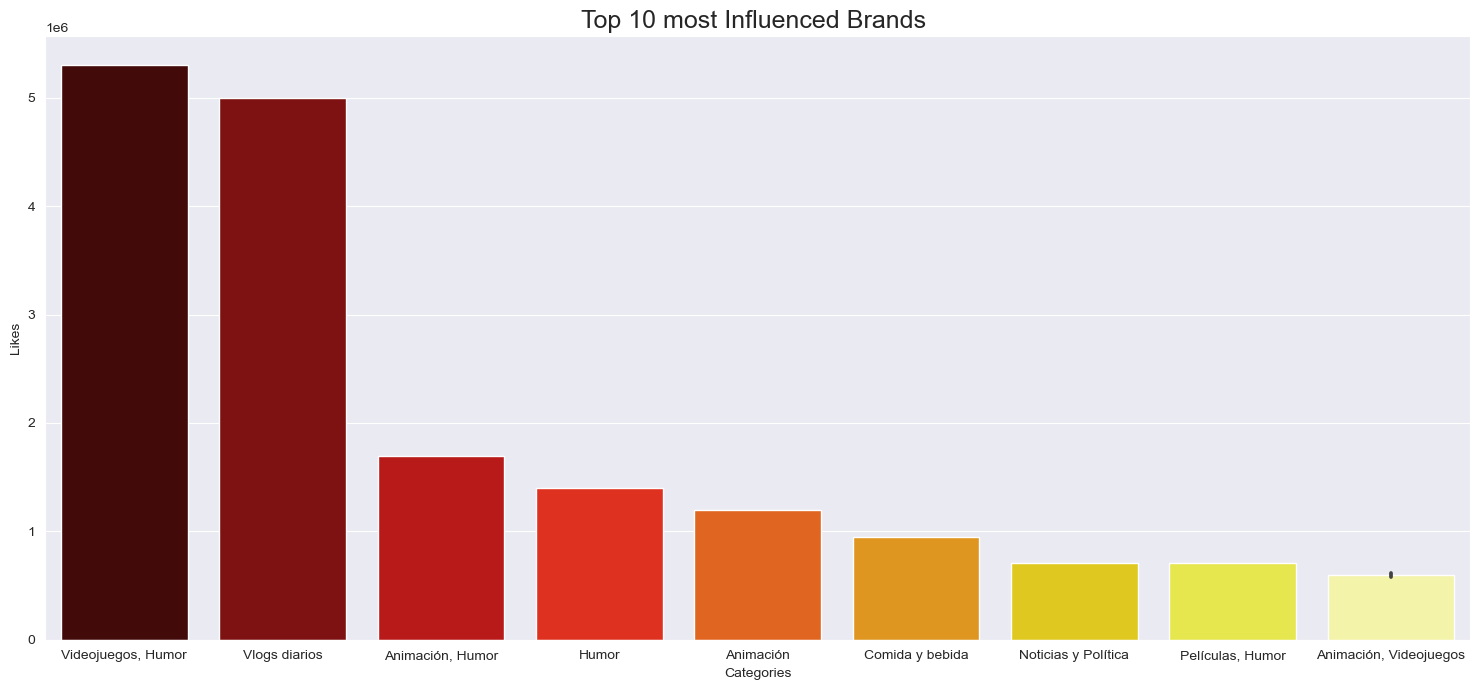

<Figure size 640x480 with 0 Axes>

In [101]:
plt.figure(figsize=(15,7))
sns.barplot(data=top_brands, x='Categories', y='Likes', palette='hot')
plt.title("Top 10 most Influenced Brands ", fontsize=18)
plt.tight_layout()
plt.show()
plt.savefig("Brands")

# 7. Benchmarking Analysis: Top-Performing Content Creators

This benchmarking analysis focused on identifying content creators demonstrating exceptional performance metrics across subscribers, visits, likes, and comments within the streaming platform. The examination aimed to spotlight and recognize the top-performing content creators who exhibit remarkable influence and engagement levels, positioning themselves prominently within the streaming landscape.

In [104]:
visit = youtube[['Username', 'Visits', 'Subscribers']].sort_values(by = 'Visits' ,ascending=False)

top_visit = visit.head(10)
top_visit

,Username,Visits,Subscribers
1,MrBeast,117400000.0,183500000.0
136,MrBeast2,83100000.0,31300000.0
153,DaFuqBoom,52700000.0,29800000.0
488,BeastPhilanthropy,21500000.0,16900000.0
288,VillageCookingChannel,21500000.0,22500000.0
390,jaanvipatel,19100000.0,19100000.0
586,_vector_,15400000.0,15400000.0
958,dojacat,13600000.0,11900000.0
300,alfredolarin,12900000.0,21900000.0
805,NickPro,12200000.0,13200000.0


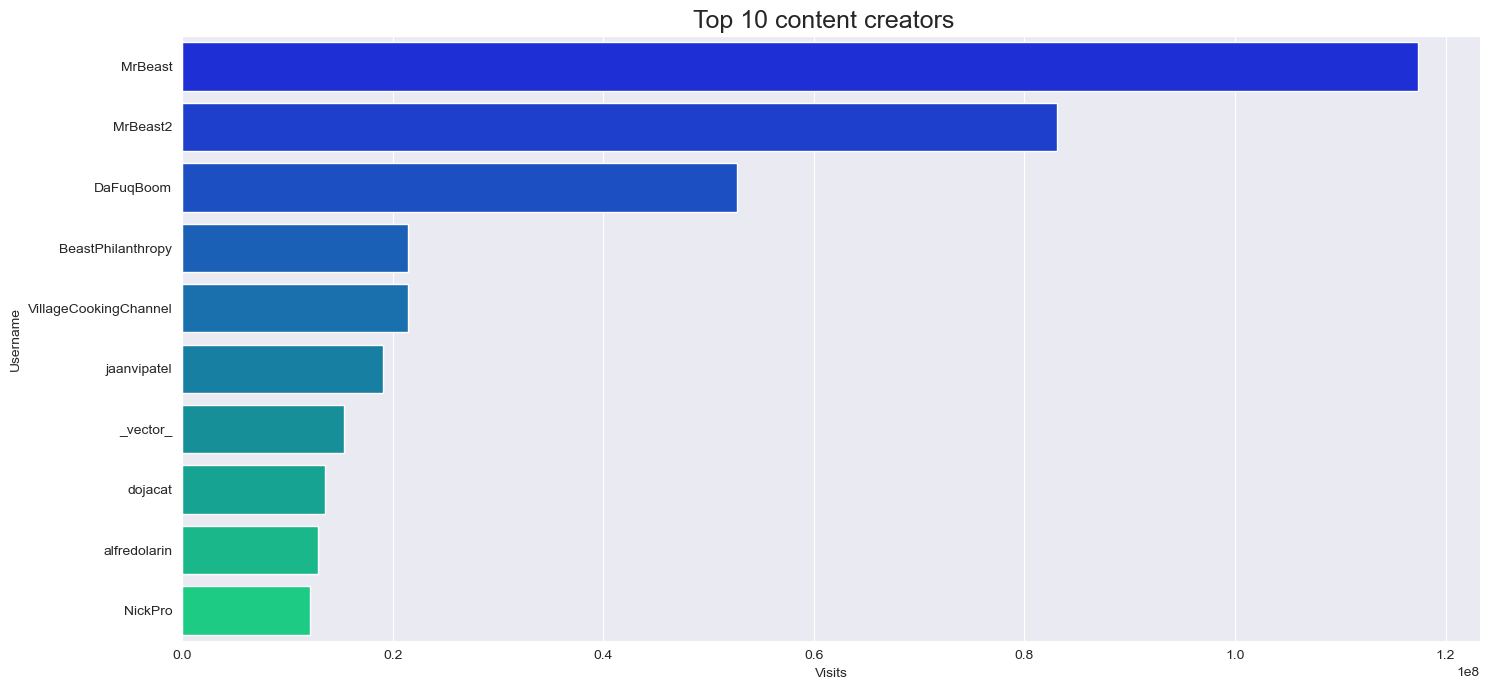

<Figure size 640x480 with 0 Axes>

In [107]:
plt.figure(figsize=(15,7))
sns.barplot(data=top_visit, x='Visits', y='Username', palette='winter', orient='h')
plt.title("Top 10 content creators  ", fontsize=18)
plt.tight_layout()
plt.show()
plt.savefig("topContentCreators")

# 8.  Content Recommendations System Enhancement Proposal

## Category-based Recommendations

Enhance YouTube's content recommendations by categorizing streamer content. Utilize user preferences to match categorized videos, offering personalized recommendations. Improve user satisfaction and engagement through tailored content suggestions.